Import all libraries that may require

In [6]:
import sklearn as sk
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt

In [7]:
Fraud_Data = np.genfromtxt('creditcard.csv',delimiter=',')
print ('Data imported')

Data imported


In [8]:
Fraud_Data = np.delete(Fraud_Data,(0),axis=0)    # remove header

In [9]:
def findCorrelation():
    corr = np.zeros((len(Fraud_Data[1]),len(Fraud_Data[1])))
    for i in range(1,len(Fraud_Data[1])):
        for j in range(i,len(Fraud_Data[1])-1):
            corr[i][j] = np.corrcoef(Fraud_Data[:,i],Fraud_Data[:,j])[0][1]
    np.savetxt('correlation.csv',corr,delimiter=',')
    return corr

In [10]:
corr = findCorrelation()

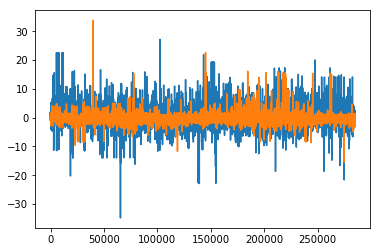

In [11]:
plt.plot(Fraud_Data[:,21])
plt.plot(Fraud_Data[:,28])

plt.show()